Лабораторная работа 4

Хачатрян Армен БПМ153
4.1.28 $$ sin(x_2+1)-x_1-1=0 $$
       $$ 2x_2+cos(x_1)-0.5=0 $$
       
28 Вариант

![%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202018-06-11%20%D0%B2%2012.26.51.png](attachment:%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202018-06-11%20%D0%B2%2012.26.51.png)

#  Теория

Численное решение системы нелинейных уравнений
$$ \begin{cases}
   f_1(x_1,x_2,\ldots, x_m) = 0\\
   f_2(x_1,x_2,\ldots, x_m) = 0\\
   \ldots \\
   f_m(x_1,x_2,\ldots, x_m) = 0
 \end{cases} $$
$$\text{Задача состоит в поиске приближенного решения } \overline x^{*} = (x_1^{*},x_2^{*},\ldots,x_m^{*})^T: ||\overline x^{*} - \overline x||<\varepsilon $$
$$\overline f(\overline x) = \overline 0, \overline x \in R^m, \overline f \in R^m$$ 
$$\textbf{Матрица Якоби: }\overline f'(\overline x) = (\frac{\partial f_i}{\partial x_j}), i,j = 1,\ldots, m $$ 
$$\text{Общая схема: } $$
$$\text{1) Локализация корней: малая окрестность решения } \overline x \text{ в } R^m $$
$$\text{2) Итерационная схема }$$
$$\textbf{Метод Ньютона (линеаризация): } $$
$$\overline x^{(k)}, f_i(\overline x) = \overline 0, i = 1,\ldots, m$$
$$\text{Линейная часть разложения во формуле Тейлора в точке } x^{(k)}: $$
$$ f_i(\overline x) = f_i(\overline x^{(k)}) + \sum_{l=1}^m \frac{\partial f_i(\overline x^{(k)})}{\partial x_l}(x_l-x_l^{(k)}) $$
$$\text{В результате получим систему: } $$
$$ \overline f(\overline x)\approx \overline f(\overline x^{(k)})+\overline f'(\overline x^{(k)})(\overline x - \overline x^{(k)}) = 0$$
$$ \overline x^{(k+1)} = \overline x^{(k)} + \Delta\overline x^{(k+1)} $$ 
$$\textbf{Теорема(сходимость) : } $$
$$ ||x^{(n+1)} - \overline x||<{{1}\over{\delta}}||x^{(n)} - \overline x||^2, n\geq 0 \text{ Метод сходится с квадратичной скоростью} $$
$$ ||x^{(n)} - x^{(n-1)}||<\varepsilon $$

НАЧАЛО

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Построим график функций, выраженных через $x_{2}$

/Users/donarmenito/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  


Text(0,0.5,'$x_{2}$')

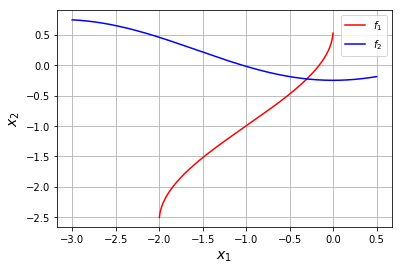

In [ ]:
def f1(x):
    return np.arcsin(x+1)-1
def f2(x):
    return 0.25-np.cos(x)/2
X = np.linspace(-3,0.5,1000)
plt.plot(X,f1(X),'r', label='$f_{1}$')
plt.plot(X,f2(X),'b', label='$f_{2}$')
plt.legend()
plt.grid()
plt.xlabel('$x_{1}$', fontsize = 14)
plt.ylabel('$x_{2}$', fontsize = 14)

### Область нахождения корня уравнения 
$$x_{1} \in (-0.5;0) $$
$$x_{2} \in (-0.5,0) $$

Зададим функцию, состоящую из 2ух функций по условию, и ее матрицу Якоби

In [ ]:
def f(x1,x2):
    return [np.sin(x2+1)-x1-1, 2*x2+np.cos(x1)-0.5]
def df(x1,x2):
    df1x1 = -1
    df1x2 = np.cos(x2+1)
    df2x1 = -np.sin(x1)
    df2x2 = 2
    return [[df1x1, df1x2], [df2x1, df2x2]]

Воспользуемся методом Ньютона, основная идея которого заключается в том, что решение нелинейной системы превращается в решение некоторого количества линейных систем вида: `
$$ \vec{x}^{(k+1)}: \quad f(x^{k}) + f'(x^{k})(x^{k+1}-x^{k}) = 0 $$

In [ ]:
from sympy.solvers import solve
from sympy import Symbol
x1 = Symbol('x1')
x2 = Symbol('x2')
def newton(f, df, x0, eps):
    xn = x0
    xn1=solve(f(xn[0],xn[1]) + np.dot(df(xn[0],xn[1]), [x1-xn[0], x2-xn[1]]), x1, x2)
    xn1=np.array([xn1[x1],xn1[x2]], dtype='float')
    k = 1
    while np.linalg.norm(np.array([xn1[0] - xn[0], xn1[1] - xn[1]], dtype='float')) > eps:
        xn = xn1
        xn1 = solve(f(xn[0],xn[1]) + np.dot(df(xn[0],xn[1]), [x1-xn[0], x2-xn[1]]),  x1, x2)
        xn1 = np.array([xn1[x1],xn1[x2]], dtype='float')
        k=k+1
    return xn1, k

Зададим начальное приближение

In [ ]:
x01 = [-1,0]

Запустим метод

In [ ]:
solution = newton(f,df,x01,10**(-6))

In [ ]:
print('x1 = ', solution[0][0], '\n', 'x2 = ', solution[0][1], '\n', 'steps = ', solution[1])

x1 =  -0.301982225698 
 x2 =  -0.22737441245 
 steps =  4


Найдем решение через SciPy

In [ ]:
def f_mod(x):
    return [np.sin(x[1]+1)-x[0]-1, 2*x[1]+np.cos(x[0])-0.5]

In [ ]:
from scipy.optimize import root
r = root(f_mod,x01)
r

    fjac: array([[-0.93602157,  0.35194263],
       [-0.35194263, -0.93602157]])
     fun: array([  6.66133815e-15,  -3.49165141e-14])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([ -3.31704796e-11,   5.42565114e-11])
       r: array([ 1.08564645, -0.01805924, -2.03950017])
  status: 1
 success: True
       x: array([-0.30198223, -0.22737441])

In [ ]:
# Погрешность корня
r.x-solution[0]

array([ -1.15962795e-13,   3.78586051e-14])

КОНЕЦ